<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/main/driveway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
import cv2
image=cv2.imread('/content/drive/MyDrive/車道/frame_0000.jpg')
image2=image.copy()


In [70]:
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

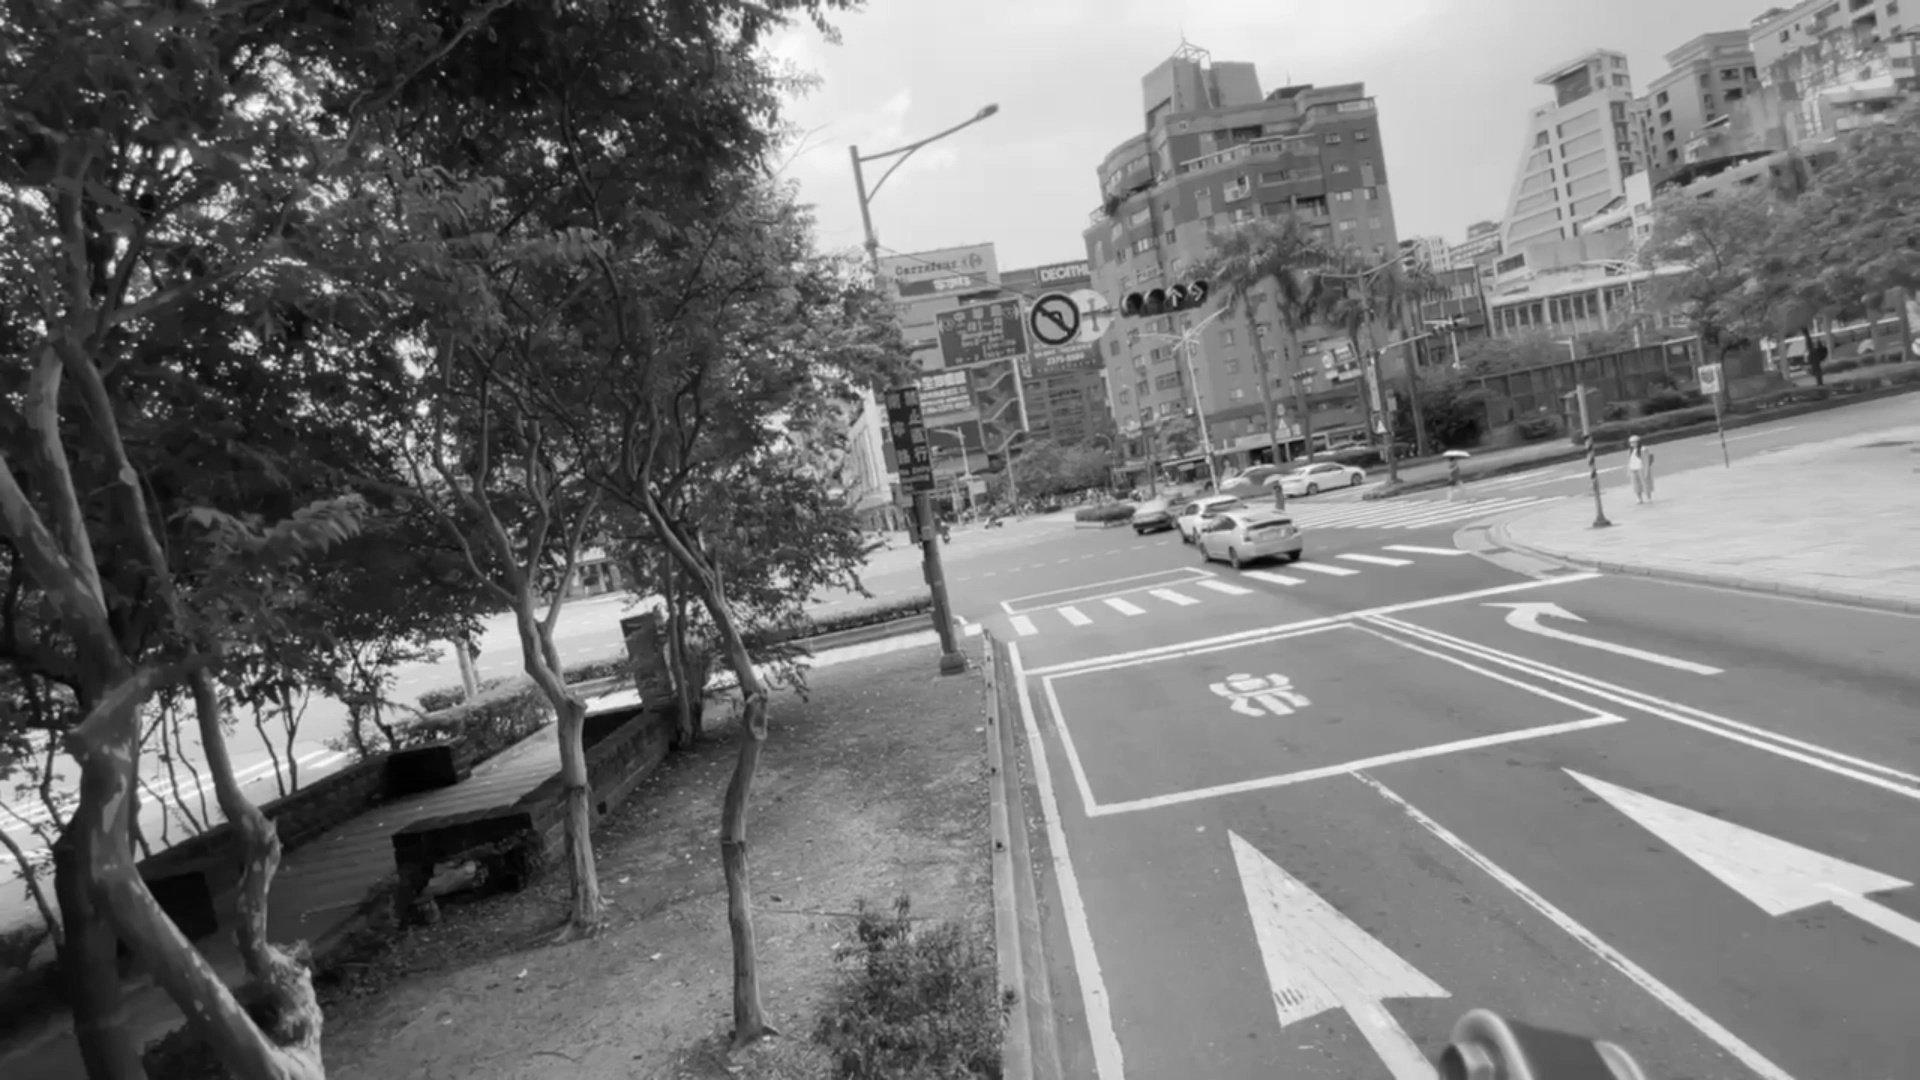

In [73]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray_img)


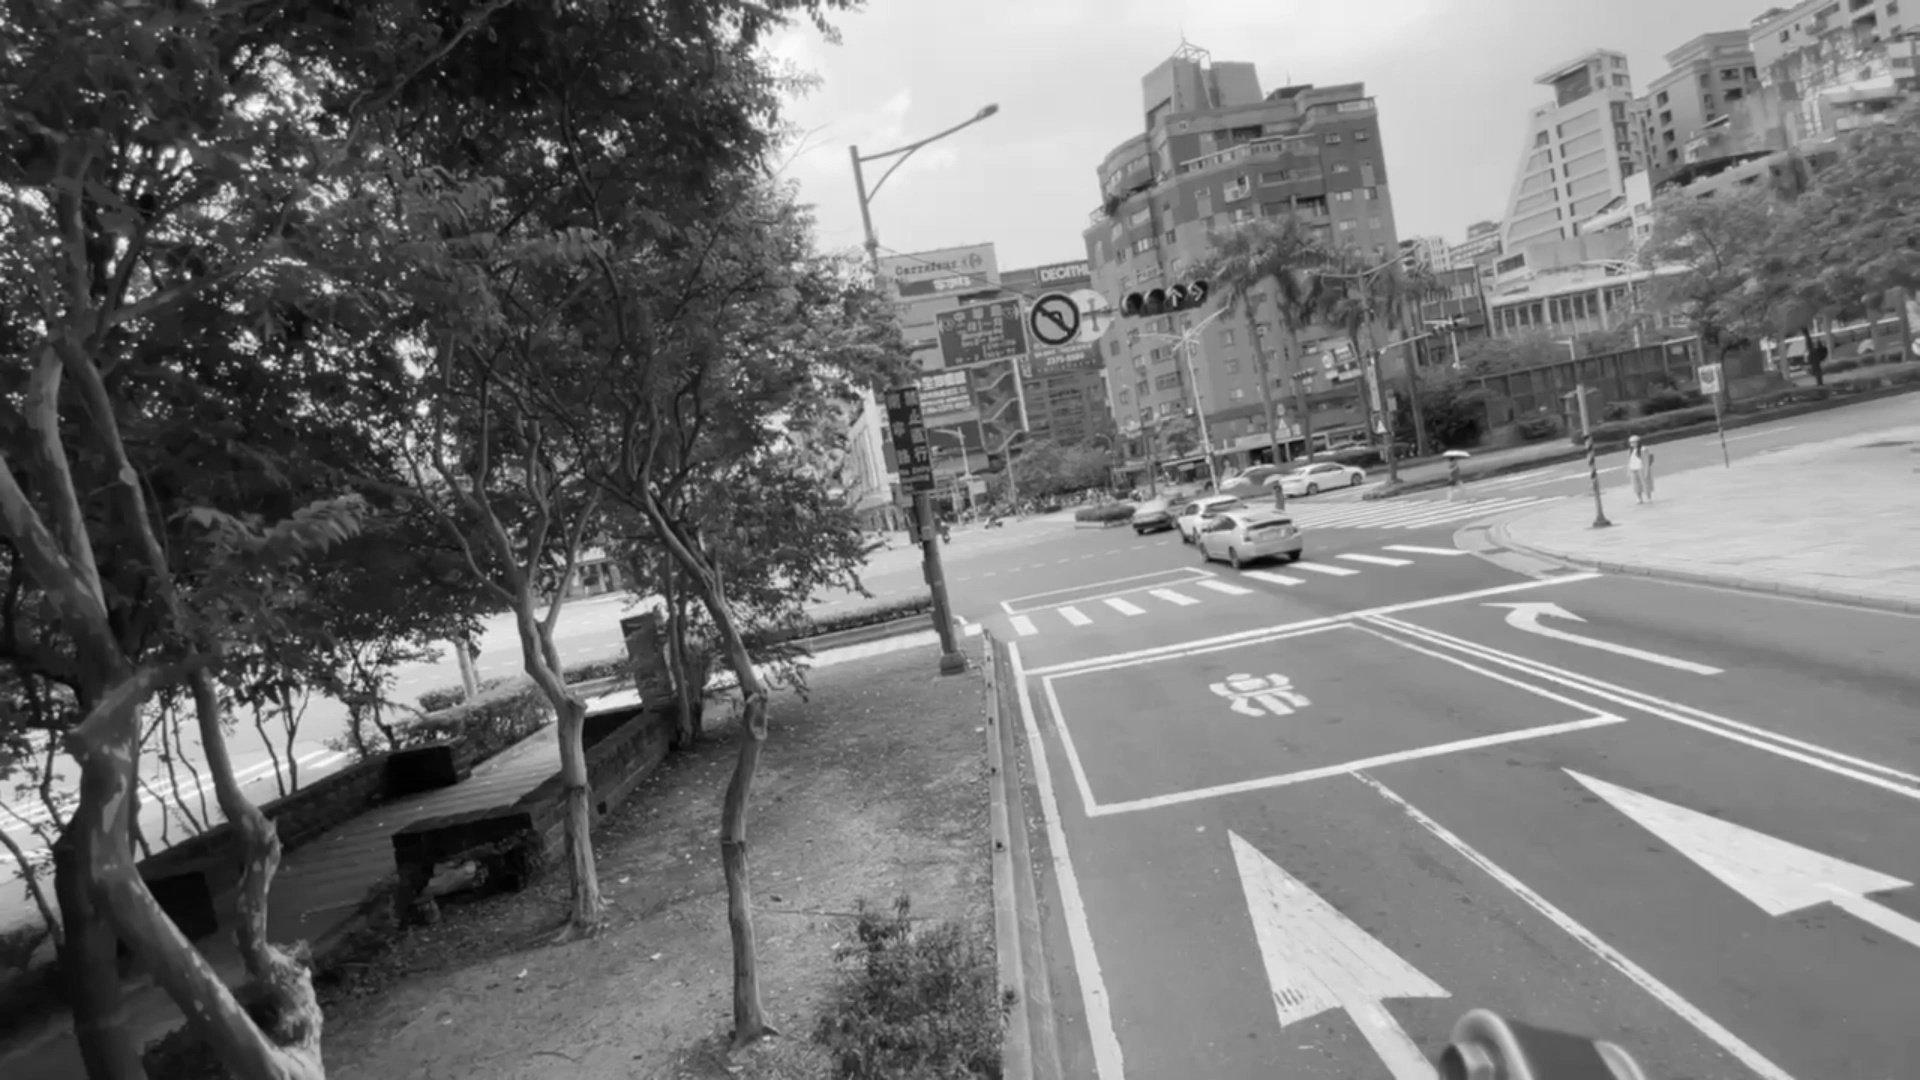

In [74]:

kernel_size = (1, 1)  # 高斯和大小 通常奇數
sigma_x = 0  # X方向上的標準差，0 表示根據核大小自動計算
# 高斯濾波器
blurred_img = cv2.GaussianBlur(gray_img, kernel_size, sigma_x)
cv2_imshow(blurred_img)

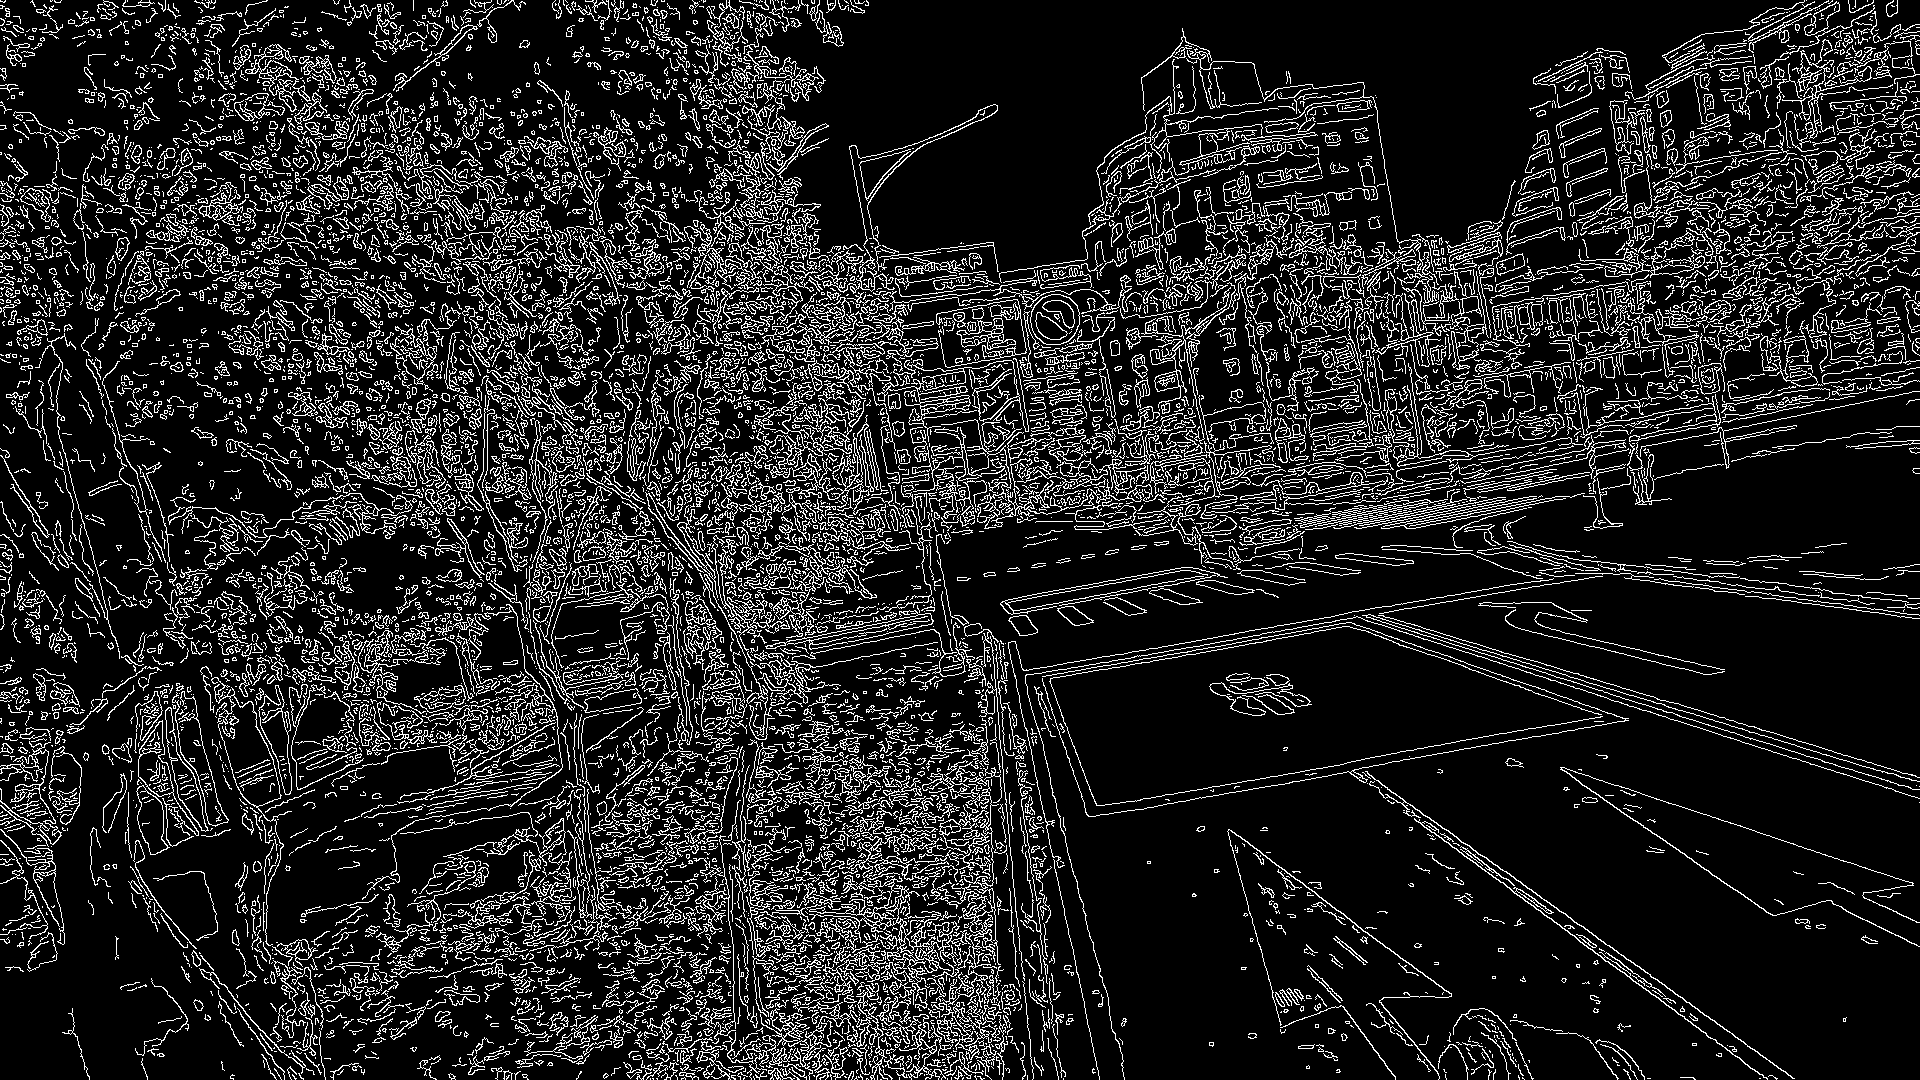

In [75]:
# 使用 Canny 邊緣檢測
edges = cv2.Canny(blurred_img, 30, 60)
cv2_imshow(edges)

#定義遮罩

In [11]:
import numpy as np

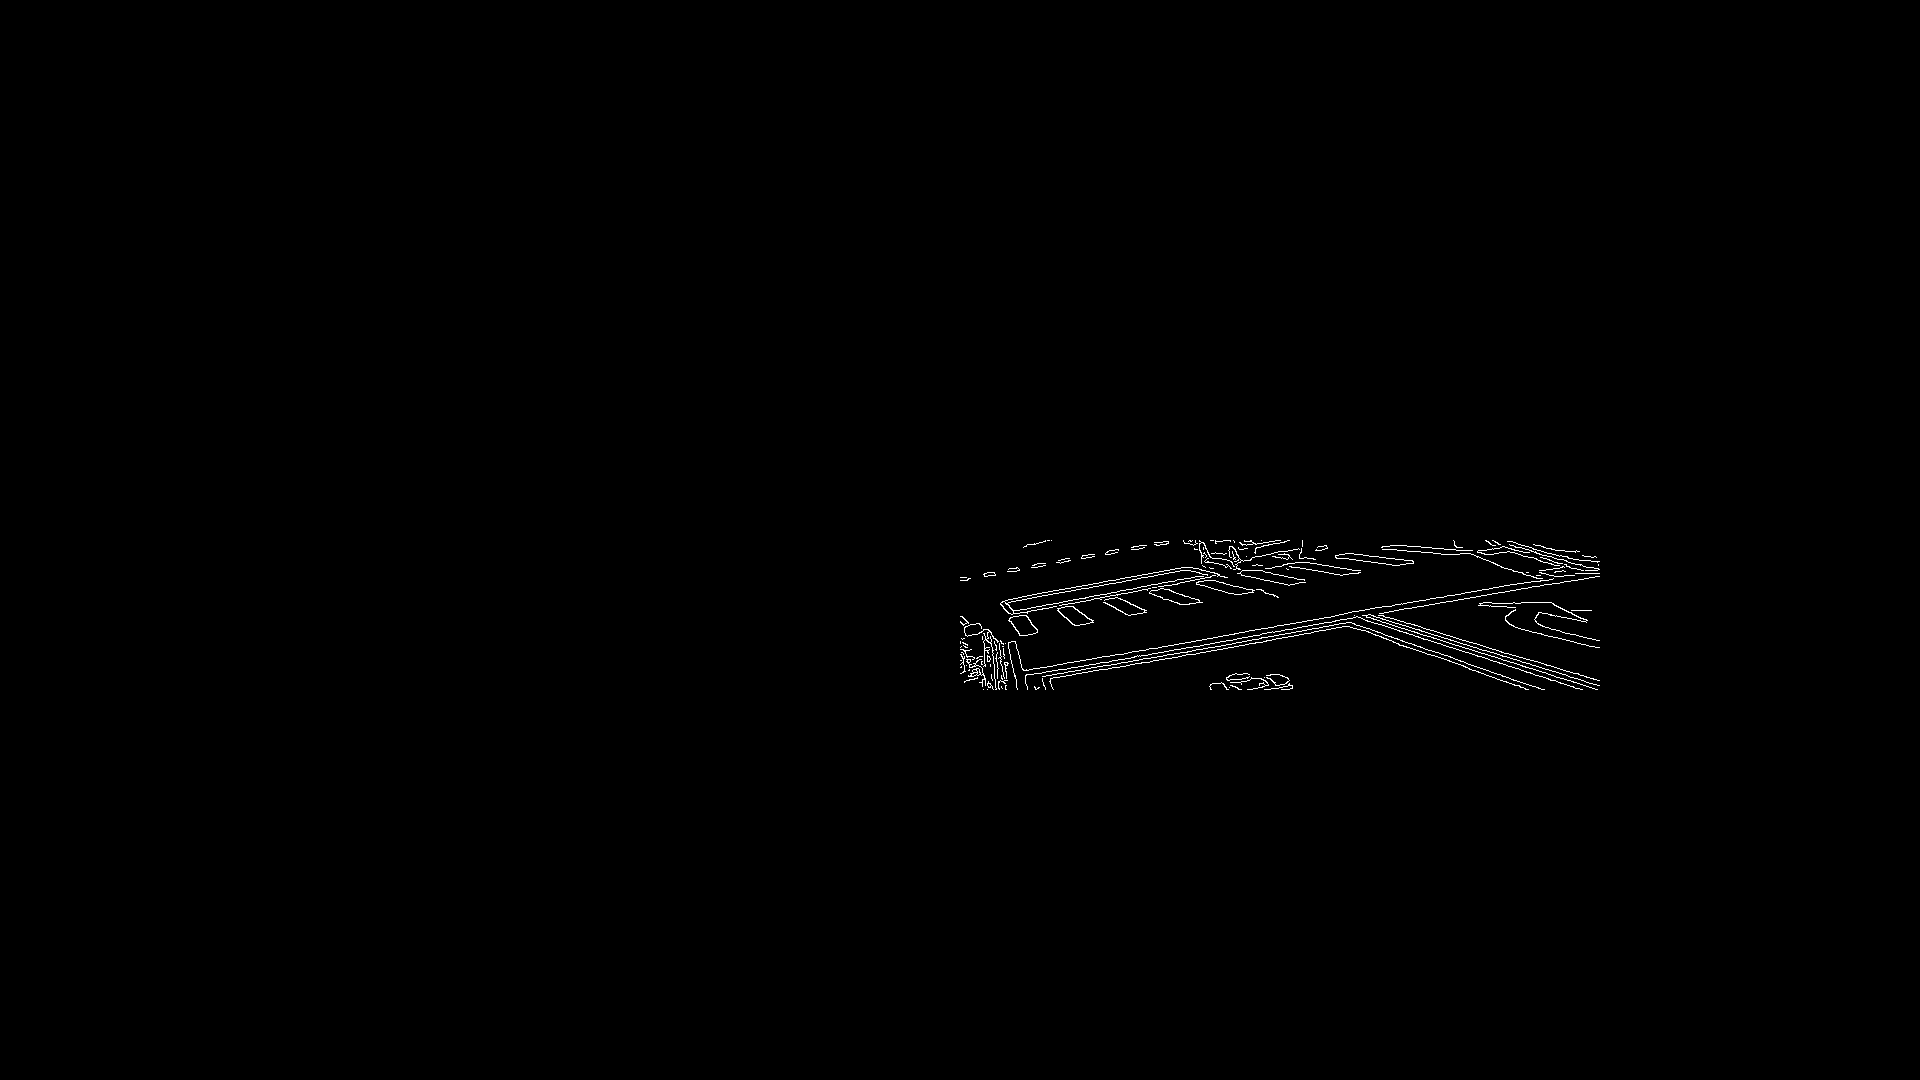

In [78]:
mask=np.ones_like(edges)*0
h,w=mask.shape[0:]
mask[h//2:h//2+150,w//2:w//2+640]=255
mask_edges=cv2.bitwise_and(edges,mask)
cv2_imshow(mask_edges)


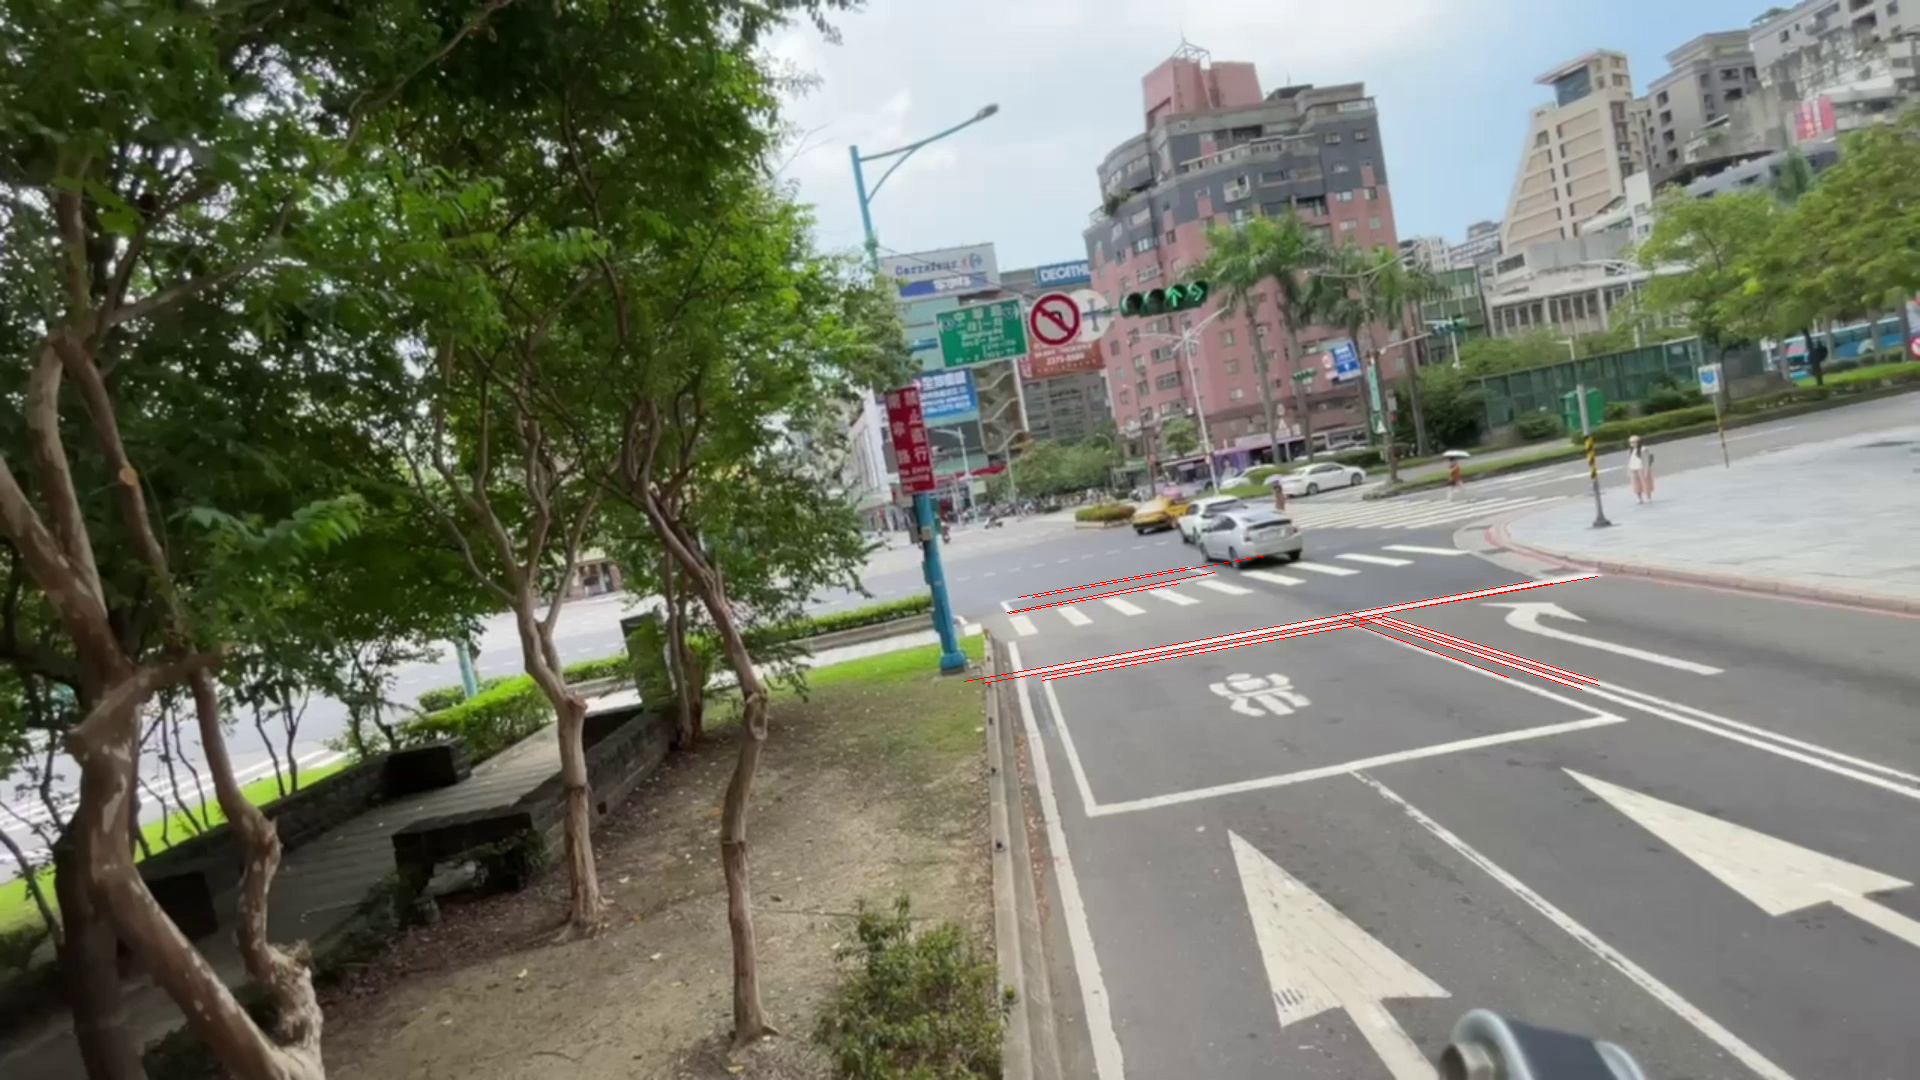

In [79]:
import numpy as np
image=image2.copy()
# 使用 Hough 變換來檢測直線
#直線距離精度,角度精度,閾值參數,最小線段長度,兩個點之間的最大允許間隙
lines = cv2.HoughLinesP(mask_edges, 1, np.pi / 180, 90, minLineLength=150, maxLineGap=15)
# 在原圖像上畫出檢測到的直線
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
cv2_imshow(image)


In [67]:
len(lines)

4